# Тестовое задание для Маргарито

Маргарито — интернет-сервис для размещения объявлений о товарах, вакансиях и резюме на рынке труда, а также услугах от частных лиц и компаний.

Есть гипотеза, что Маргарито теряет лояльность пользователей из-за неэффективности текущей системы поддержки:

Либо ответы даются слишком долго, либо проблема пользователя не решена.

**Задача:** 

Подтвердить или опровергнуть гипотезу. 


Если гипотеза подтвердится, то оценить примерный урон для сайта Маргарито: в недополученных кол-ве объявлений и пользователях. 


Что ожидаем получить на выходе: Презентацию (не более 10 слайдов) с отдельным комментарием – ответ на саму задачу и описание методов решения.   

## Описание данных


**support_tickets** — таблица содержит обращение в службу поддержки Маргарито c сентября 2015 по декабрь 2015 включительно. 

- User_id– уникальный идентификатор пользователя;       
- creation_date (activity_start_dt) – столбец, когда пользователь завел тикет (обращение);       
- fact_reaction – время ответа специалиста поддержки;       
- current_state – состояние обращения на текущий момент. В данных тикеты только в состоянии «решено», что означает, что был дан окончательный ответ со стороны поддержки, но не обязательно решен с точки зрения пользователя; 
- ticket_category, subcategory – тема обращения в поддержку;       
- request_id – Уникальный идентификатор обращения в системы поддержки;


**users_evaluation_of_satisfaction** — содержит оценку пользователями их удовлетворенности после окончательного ответа сотрудника службы поддержки. Не все тикеты имеют оценку от пользователя.

- request_id — id пользователя;
- result_mentioned_by_user — ползовательская оценка;

**New_items_by_support_users** — таблица с подачами объявлений (только пользователи, обратившиеся в поддержку в период с сентября 2015 по декабрь 2015)

- user_id – уникальный идентификатор пользователя;
- user_registration_time – дата регистрации пользователя; 
- user_first_listing_date – дата размещения первого объявления;
- item_id – уникальный идентификатор объявления;
- item_starttime – время публикации объявления;      
- item_category – категория объявления (Транспорт, Недвижимость и т.д.);
- item_subcategory – подкатегория объявления (Автомобили, Автозапчасти и т.д.);


## Оглавление

#### Импорт библиотек и загрузка данных

#### Предобработка данных

- Исследование пропущенных значений;
- Нахождение дубликатов и удаление повторяющихся значений;
- Изменение формата даты;

#### Исследовательский анализ данных

- Рассмотрим данные за представленный период;
- Изучим какие оценки содержатся в ответах пользователей и их количество;
- Вывод
- Изучим среднее время ожидания ответа от тех.поддержки
- Изучим более детально время ожидания ответа по минутам, часам, дням. Также, найдём среднее значение.
- Вывод

#### Изучим влияние негативной оценки и времени

- Вывод
- Проверим нашу гипотезу методами статистики.Анализируем различие в среднем времени ответа по двум группам
- Гипотеза: Cреднее время ожидания ответа от пользователей с негативной оценкой не отличается от пользователей с положительной оценкой

#### Изучим негативное влияние на сайт Маргарито от группы «нелояльных» пользователей

- Изучим распределение среднего количества публикуемых объявлений для каждого пользователя
- Объединим два фрейма и выделим две группы: с неудовлетворительной оценкой и все остальные.
- Для двух групп сделаем группировку по уникальным пользователям и рассчитываем количество объявлений для каждого пользователя
- Находим среднее количество объявлений для пользователей в каждой из групп и сравниваем.
- Рассчитываем количество пользователей в каждой из групп
- Умножаем среднее количество объявлений на количество пользователей, в каждой из групп. Проводим сравнение по примерному недополученному количеству объявлений.
- Находим доли от общего количества
- Вывод
- Проверим нашу гипотезу методами статистики. Анализируем различие в среднем количестве объявлений по двум группам
- Гипотеза: Cреднее количество объявлений от нелояльных пользователей не отличается от ср. количества объявлений лояльных пользователей

#### Финальный вывод



## Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
support_t = pd.read_csv('support_tickets.csv')
users_evaluation = pd.read_csv('users_evaluation_of_satisfaction.csv')
table_by_support = pd.read_csv('new_items_by_support_users (1).csv')

In [3]:
support_t.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [4]:
users_evaluation.head()

,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


In [5]:
table_by_support.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [6]:
support_t.info()
print()
users_evaluation.info()
print()
table_by_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397530 entries, 0 to 397529
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             397530 non-null  object
 1   ticket_category     397530 non-null  object
 2   ticket_subcategory  397530 non-null  object
 3   current_state       397530 non-null  object
 4   request_id          397530 non-null  object
 5   activity_start_dt   397530 non-null  object
 6   fact_reaction_dt    397530 non-null  object
dtypes: object(7)
memory usage: 21.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217533 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217533 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB

<class 'pandas.core.frame.DataFrame'

Количество и названия столбцов совпадает с заявленными. Значения в колонках дат представлены в строковом формате. Их необходимо перевести в удобный формат даты и времени.

## Предобработка данных

**Исследование пропущенных значений**

In [7]:
# Проверяем наличие пропусков
for row in support_t.columns:
    print('Кол-во пропусков в столбце ', row, '=', support_t[row].isnull().sum())

Кол-во пропусков в столбце  user_id = 0
Кол-во пропусков в столбце  ticket_category = 0
Кол-во пропусков в столбце  ticket_subcategory = 0
Кол-во пропусков в столбце  current_state = 0
Кол-во пропусков в столбце  request_id = 0
Кол-во пропусков в столбце  activity_start_dt = 0
Кол-во пропусков в столбце  fact_reaction_dt = 0


In [8]:
users_evaluation.isnull().sum()

request_id                  119
result_mentioned_by_user      0
dtype: int64

Обнаружены пропуски в id пользователя. Их нельзя восстановить, поэтому заменим на «0». Пропущенных значений примерно 0,05% от общего датасета, замена на «0» никак не повлияет на достоверность дальнейшего исследования.

In [9]:
users_evaluation.request_id = users_evaluation.request_id.fillna(0)

In [10]:
users_evaluation.isnull().sum()

request_id                  0
result_mentioned_by_user    0
dtype: int64

In [11]:
# Проверяем наличие пропусков
for row in table_by_support.columns:
    print('Кол-во пропусков в столбце ', row, '=', table_by_support[row].isnull().sum())

Кол-во пропусков в столбце  user_id = 0
Кол-во пропусков в столбце  user_registration_time = 0
Кол-во пропусков в столбце  user_first_listing_date = 0
Кол-во пропусков в столбце  item_id = 0
Кол-во пропусков в столбце  item_starttime = 0
Кол-во пропусков в столбце  item_category = 0
Кол-во пропусков в столбце  item_subcategory = 0


**Нахождение дубликатов и удаление повторяющихся значений**

In [12]:
support_t.duplicated().sum()

0

In [13]:
users_evaluation.duplicated().sum()

6459

In [14]:
users_evaluation = users_evaluation.drop_duplicates().reset_index(drop = True)

**Изменим формат даты**

In [15]:
support_t['activity_start_dt'] = pd.to_datetime(
    support_t['activity_start_dt'], 
    format='%Y-%m-%d %H:%M:%S'
)
support_t['fact_reaction_dt'] = pd.to_datetime(
    support_t['fact_reaction_dt'],
    format='%Y-%m-%d %H:%M:%S' 
)

In [16]:
# Добавим дополнтиельную колонку с датой обращения в тех.поддержку
support_t['date'] = support_t.activity_start_dt.dt.date

## Исследовательский анализ данных

**Рассмотрим данные за представленный период**

In [17]:
print('Начало периода :', support_t.date.min())
print()
print('Конец периода :', support_t.date.max())

Начало периода : 2015-08-14

Конец периода : 2015-12-31


Первая указанная дата — 14 августа 2015 года, последняя — 31 декабря 15го. Таким образом, у нас представлены данные за 5 месяцев.

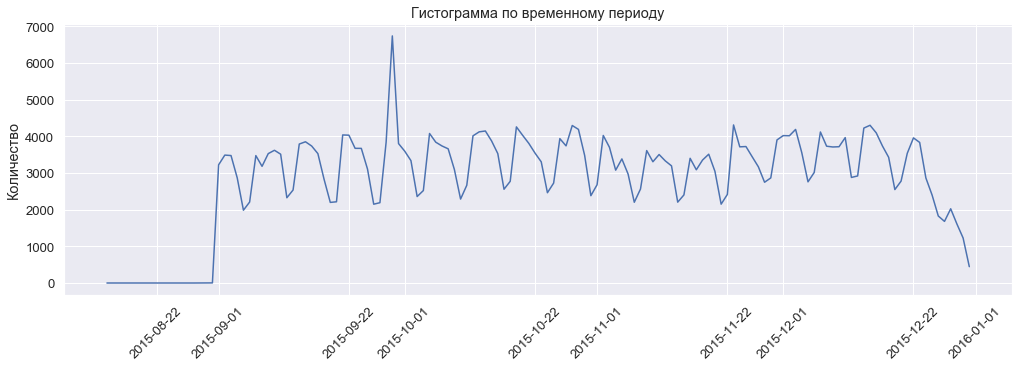

In [18]:
period_date = support_t.groupby('date')['user_id'].count().reset_index()



sns.set(font_scale=1.2)
plot = period_date.plot(x = 'date', y = 'user_id', 
                        grid = True, rot=45, 
                        legend=False, figsize=(17,5))
plt.title('Гистограмма по временному периоду')
plt.xlabel('')
plt.ylabel('Количество');

Рассмотрев гистограмму мы видим, что полные данные представлены с 1го сентября 2015 по конец декабря 15го. Мы не будем использовать данные за август 15го.

In [19]:
# Отсекаем временной период, который не будем использовать
full_date = pd.to_datetime('2015-09-01', format = '%Y-%m-%d')
support_t = support_t[support_t['activity_start_dt'] >= full_date]

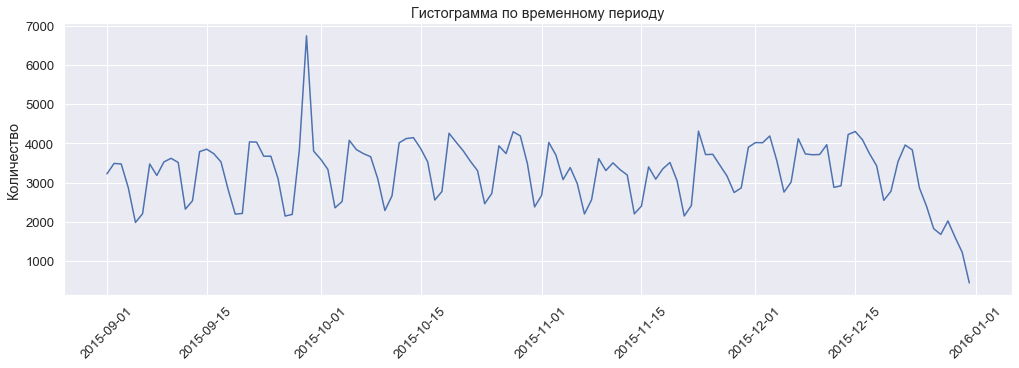

In [20]:
period_date = support_t.groupby('date')['user_id'].count().reset_index()



sns.set(font_scale=1.2)
plot = period_date.plot(x = 'date', y = 'user_id', 
                        grid = True, rot=45, 
                        legend=False, figsize=(17,5))
plt.title('Гистограмма по временному периоду')
plt.xlabel('')
plt.ylabel('Количество');

In [21]:
support_t.shape

(397523, 8)

На гистограмме заметен отдельный всплекс по количеству обращений в конце сентября. Возможно, не работал сайт. Предположительно, узнать можно по характеру обращений в данный период.

**Изучим какие оценки содержатся в ответах пользователей и их количество**

In [22]:
cnt_value = users_evaluation.result_mentioned_by_user.value_counts()
cnt_value

Отлично                 108057
Не удовлетворительно     43214
Хорошо                   30731
Нейтрально               17427
Удовлетворительно        11645
Name: result_mentioned_by_user, dtype: int64

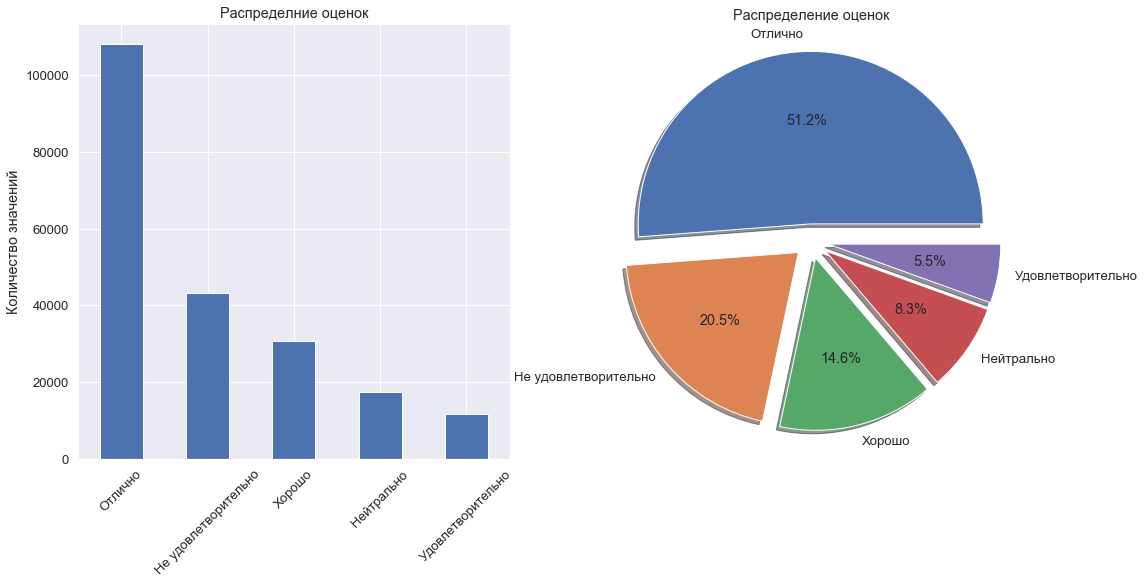

In [23]:
sns.set(font_scale=1.2)
plt.subplots(figsize=(17, 8))
plot = cnt_value.plot(kind='bar', rot=45, x=plt.subplot(1,2,1))
plt.title('Распределние оценок')
plt.xlabel('')
plt.ylabel('Количество значений')

plot = cnt_value.plot(
        kind='pie',
        autopct='%1.1f%%',
        
        title='Распределение оценок',
        y='result_mentioned_by_user',
        legend=False,
        explode=(0.1, 0.1, 0.1, 0.1, 0.1),
        shadow=True,
    ax = plt.subplot(1,2,2)
    
)
plt.ylabel('')
plt.show()


В значительной степени преобладают положительные оценки от пользователей — 51.2% — «отлично» и 14.6% — «хорошо». Однако, наблюдается выраженная часть неудовлетворительных оценок — 20.5%.

Необходимо узнать, с чем связаны положительные и неудовлетворительные оценки пользователей. Возможно, превышено время ожидания ответа или вопрос не решён.

In [24]:
# Всего оценок пользователей
users_evaluation.result_mentioned_by_user.count()

211074

Зная общее количество пользовтелей за указанный период, мы находим количество пользователей не поставивших оценку — 186 тыс. 449 человек — примерно 46% пользователей.

### Вывод

В значительной степени преобладают положительные оценки от пользователей — 51.2% — «отлично» и 14.6% — «хорошо». Однако, наблюдается выраженная часть неудовлетворительных оценок — 20.5%. 

Таким образом, предположительно, негативная оценка от пользователей может негативно повлиять на лояльность.

### Изучим среднее время ожидания ответа от тех.поддержки

Для этого нужно посчитать время ожидания для всех пользователей и вычислить среднее.

In [25]:
support_t['duration'] = (support_t.fact_reaction_dt - support_t.activity_start_dt).dt.seconds

In [26]:
support_t.duration.describe()

count    397523.000000
mean      29323.996700
std       27681.798734
min           0.000000
25%        4260.000000
50%       19200.000000
75%       53460.000000
max       86340.000000
Name: duration, dtype: float64

В данных присутсвуют большие значения — ответы тех.поддержки пользователям через 111 дней. Они воспринимаются как всплески, искажающие картину среднего. Поэтому для расчёта среднего будем использовать медианное значение.

In [27]:
86340/.60/.60

239833.33333333334

Максимальное ожидание ответа составляет примерно 1 день.

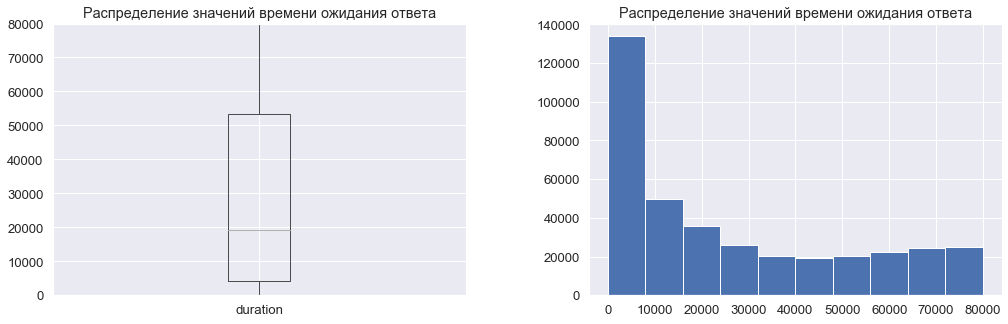

In [28]:
plt.subplots(figsize=(17,5))
plot = support_t.boxplot(
    'duration',
    ax = plt.subplot(1,2,1),
    
)
plt.title('Распределение значений времени ожидания ответа')
plt.ylim(0,80000)
plot = support_t.hist(
    'duration',
    ax = plt.subplot(1,2,2),
    range=(0,80000)
)
plt.title('Распределение значений времени ожидания ответа');

Наиболее частые значения соответствуют времени ожидания примерно в 16 минут.

In [29]:
# Посмотрим среднее по всем значениям
support_t['duration'].median()

19200.0

Среднее ожидание ответа от тех.поддержки составляет примерно 5 часов, с момента обращения пользователя.

Изучим более детально временную продолжительность за счет выделения определенной доли от всех «ожиданий»

In [30]:
ratio = support_t.query('duration < 19200')['duration'].count() / support_t['duration'].count()
print('Распространенность продолжительности ответа дилтельностью до 5 часов от общего числа временных ожиданий: {:.1%}'
      .format(ratio))

Распространенность продолжительности ответа дилтельностью до 5 часов от общего числа временных ожиданий: 50.0%


То есть, время ожидания ответа меньшего, чем 5 часов примерно столько же. Необходимо узнать медианные значения.

In [31]:
support_t.query('duration < 19200')['duration'].median()

4260.0

In [32]:
4260/.60/.60

11833.333333333334

Ожидание ответа от тех. поддержки составляет примерно 1 час.

Узнаем, самое частое значение по времени ожидания.

In [33]:
support_t['duration'].mode()[0]

180

Чаще всего тех.поддержка отвечает через 3 минуты, после обращения пользователя. Но, в основном время ожидания ответа составляет примерно 1 час. В среднем тех.поддержка отвечает через 5 часов. 

### Изучим более детально время ожидания ответа по минутам, часам, дням. Также, найдём среднее значение.

In [34]:
# Группировка времени ожидания по пользователям и выбор первой даты обращения
user_grouped = support_t.groupby('user_id').agg({'activity_start_dt':'min'}).reset_index()

# Группировка времени ответов по пользователям и выбор первой даты ответа
teh_answer_grouped = support_t.groupby('user_id').agg({'fact_reaction_dt':'min'})

In [35]:
# Объединяем данные о первом обращение и первом ответе по пользователям в одну таблицу
user_to_answer = pd.merge(user_grouped, teh_answer_grouped, on='user_id')

In [36]:
# Рассчитываем время между обращением и ответом
user_to_answer['time_deal'] = user_to_answer['fact_reaction_dt'] - user_to_answer['activity_start_dt']

In [37]:
user_to_answer.head() # Проверяем

,user_id,activity_start_dt,fact_reaction_dt,time_deal
0,100 000 095,2015-10-14 14:12:00,2015-10-14 14:15:00,0 days 00:03:00
1,100 000 209,2015-10-10 18:06:00,2015-10-14 19:30:00,4 days 01:24:00
2,100 000 217,2015-11-09 17:43:00,2015-11-15 11:48:00,5 days 18:05:00
3,100 000 232,2015-09-22 12:54:00,2015-09-22 13:21:00,0 days 00:27:00
4,100 000 242,2015-09-15 20:41:00,2015-09-16 18:18:00,0 days 21:37:00


Как мы видим, пользователи получают ответ как через несколько минут, так и через несколько часов и дней. Поэтому рассчитаем time delta для минут, часов и дней.

In [38]:
user_to_answer['time_deal'].describe()

count                    298951
mean     2 days 00:52:48.447605
std      3 days 20:41:28.534387
min           -3 days +20:21:00
25%             0 days 01:47:00
50%             0 days 17:06:00
75%             2 days 12:08:00
max           111 days 20:35:00
Name: time_deal, dtype: object

In [39]:
import numpy as np

In [40]:
user_to_answer['time_deal_min'] = (user_to_answer.fact_reaction_dt - user_to_answer.activity_start_dt) / np.timedelta64(1, 'm')
user_to_answer['time_deal_hours'] = (user_to_answer.fact_reaction_dt - user_to_answer.activity_start_dt) / np.timedelta64(1, 'h')
user_to_answer['time_deal_day'] = (user_to_answer.fact_reaction_dt - user_to_answer.activity_start_dt) / np.timedelta64(1, 'D')

In [41]:
user_to_answer.head()

,user_id,activity_start_dt,fact_reaction_dt,time_deal,time_deal_min,time_deal_hours,time_deal_day
0,100 000 095,2015-10-14 14:12:00,2015-10-14 14:15:00,0 days 00:03:00,3.0,0.050000,0.002083
1,100 000 209,2015-10-10 18:06:00,2015-10-14 19:30:00,4 days 01:24:00,5844.0,97.400000,4.058333
2,100 000 217,2015-11-09 17:43:00,2015-11-15 11:48:00,5 days 18:05:00,8285.0,138.083333,5.753472
3,100 000 232,2015-09-22 12:54:00,2015-09-22 13:21:00,0 days 00:27:00,27.0,0.450000,0.018750
4,100 000 242,2015-09-15 20:41:00,2015-09-16 18:18:00,0 days 21:37:00,1297.0,21.616667,0.900694


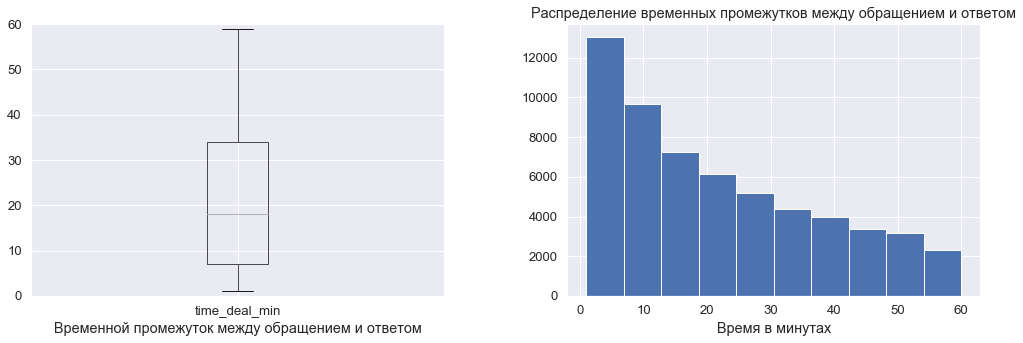

In [42]:
# Строим график распределния в первые минуты. Делаем срез по минутам от 0 до 60 мин.
plt.subplots(figsize=(17,5))
plot = user_to_answer.query('0 < time_deal_min < 60 ').boxplot('time_deal_min',
                                                                  ax = plt.subplot(1,2,1)
                                                                  )
plt.ylim(0,60)
plt.xlabel('Временной промежуток между обращением и ответом')

plot = user_to_answer.query('0 < time_deal_min < 60 ').hist(
    'time_deal_min', 
     range=(1,60), 
     ax = plt.subplot(1,2,2)
)
plt.title('Распределение временных промежутков между обращением и ответом')
plt.xlabel('Время в минутах');
plt.show()

В целом, большая часть пользователей получают ответ через 4-8 минут. В среднем, после обращения пользователи получают ответ через 18 минут.

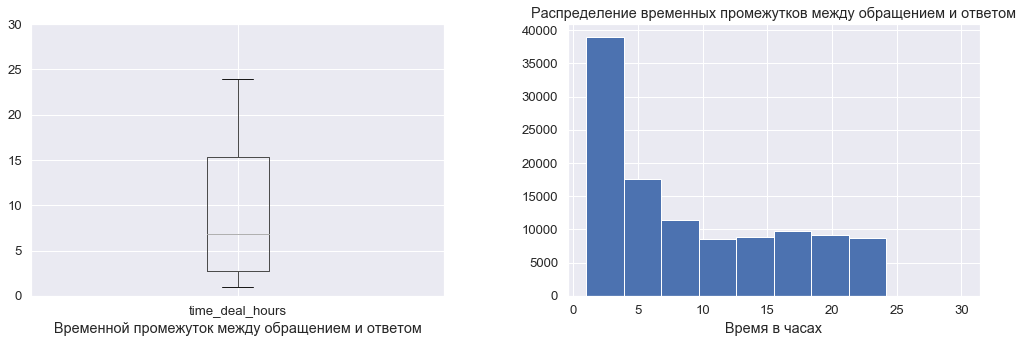

In [43]:
# Строим график распределения в первые несколько часов
plt.subplots(figsize=(17,5))
plot = user_to_answer.query('1 < time_deal_hours < 24').boxplot('time_deal_hours',
                                                                  ax = plt.subplot(1,2,1)
                                                                  )
plt.ylim(0,30)
plt.xlabel('Временной промежуток между обращением и ответом')

plot = user_to_answer.query('0 < time_deal_hours < 24 ').hist(
    'time_deal_hours', 
     range=(1,30), 
     ax = plt.subplot(1,2,2)
)
plt.title('Распределение временных промежутков между обращением и ответом')
plt.xlabel('Время в часах');
plt.show()

Основная часть пользователей получает ответ через 1-4 часа. В среднем, через 6 часов.

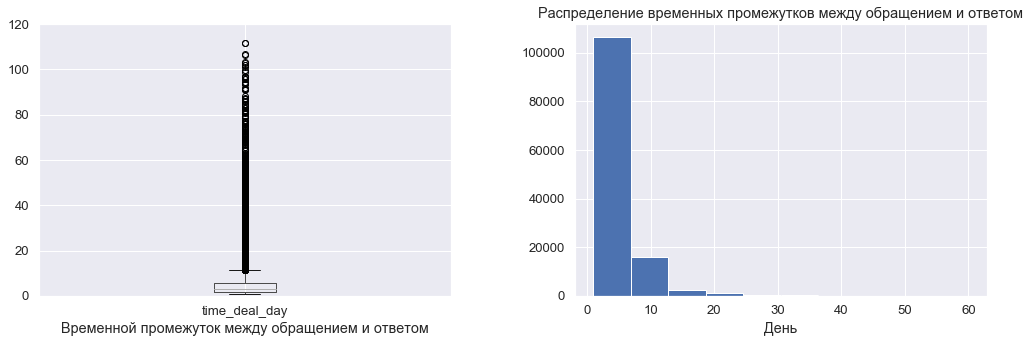

In [44]:
plt.subplots(figsize=(17,5))
plot = user_to_answer.query('1 < time_deal_day').boxplot('time_deal_day',
                                                                  ax = plt.subplot(1,2,1)
                                                                  )
plt.ylim(0,120)
plt.xlabel('Временной промежуток между обращением и ответом')

plot = user_to_answer.query('0 < time_deal_day').hist(
    'time_deal_day', 
     range=(1,60), 
     ax = plt.subplot(1,2,2)
)
plt.title('Распределение временных промежутков между обращением и ответом')
plt.xlabel('День');
plt.show()

В целом, пользователи получают ответ через 1-3 дня. В среднем, через 3 дня. Однако, есть значения через 10 и 20 дней.

In [45]:
# Посмотрим долю ожидания ответа в указанные периоды. 
minute = ((user_to_answer.query('time_deal_min < 60')['time_deal_min'].count()
          / user_to_answer.query('time_deal_min > 0')['time_deal_min'].count())
          * 100)

hours = ((user_to_answer.query('1 < time_deal_hours')['time_deal_hours'].count()
          / user_to_answer.query('time_deal_hours > 0')['time_deal_hours'].count())
          * 100)

days = ((user_to_answer.query('1 < time_deal_day < 24')['time_deal_day'].count()
          / user_to_answer.query('time_deal_day > 0')['time_deal_day'].count())
          * 100)

In [46]:
print('Процент ответов тех.поддержки в первые минуты:', int(minute), '%')
print()
print('Процент ответов тех.поддержки в первые несколько часов:', int(hours), '%')
print()
print('Процент ответов тех.поддержки в первые несколько дней:', int(days), '%')

Процент ответов тех.поддержки в первые минуты: 19 %

Процент ответов тех.поддержки в первые несколько часов: 80 %

Процент ответов тех.поддержки в первые несколько дней: 42 %


### Вывод

В основном время ожидания ответа от тех.поддержки ранжируется на несколько групп (по минутам, часам и дням):

- Есть быстрые ответы через 4-8 минут. Но среднее время ожидания ответа составляет 18 минут — доля в 19% 
- Есть быстрые ответы через 1-5 часов. Но среднее время ожидания ответа составляет 6 часов — доля в 80%
- Есть быстрые ответы через 1-3 дня. Но средрее время ожидания ответа составляет 3 дня — доля в 42%

**Таким образом**, большая часть ответов приходится на длительное время ожидания от 6 часов до 3х дней. Предположительно, такая работа тех.поддержки не эффективна и негативно сказывается на лояльности пользователей. 

Разброс по времени ожидания от нескольких минут до часов может быть связан характером и трудностью решения проблемы, которые можно попробовать определить через тему обращения пользователя. Запредельно долгие ответы (через 20, 30 дней), могут быть связаны с проблемами в системе работы тех.поддержки. Но это не является задачей данного исследования. 

### Изучим влияние негативной оценки и времени

Для этого, сначала определим связь между негативной оценкой и временем. Предположим, что:

- случаи положительной оценки от пользователя и опр.временной показатель соответствуют решению проблемы пользователя; 
- случаи отрицательной оценки от пользователя и длительное время ожидания ответа соответствуют недовольству в отношении длительного ожидания ответа;
- случаи отрицательной оценки от пользователя и короткого времени ожидания ответа соответствуют не решённой проблеме.

In [47]:
# Объединяем таблицы
merge_support_data =  support_t.merge(users_evaluation, on='request_id')
merge_support_data.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,date,duration,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,2015-11-26,47700,Хорошо
1,372 546 513,Технические вопросы,Загрузка фото,Решено,280bf0e6-6c0c-4eb1-b093-ac2eadd20cdb,2015-12-11 13:39:00,2015-12-16 05:20:00,2015-12-11,56460,Отлично
2,369 694 997,Технические вопросы,Доступ к сайту,Решено,045a97f4-4747-45e0-a3a9-441081e06c08,2015-12-17 22:46:00,2015-12-20 20:59:00,2015-12-17,79980,Отлично
3,3 254 820,Технические вопросы,Доступ к сайту,Решено,6d12e450-7aee-4842-b9cf-ee9a2824f892,2015-09-04 12:20:00,2015-09-05 10:02:00,2015-09-04,78120,Отлично
4,366 077 368,Технические вопросы,Доступ к сайту,Решено,f25c8846-9e55-4b15-9a27-6e24ca9e7922,2015-11-11 10:54:00,2015-11-14 08:53:00,2015-11-11,79140,Хорошо


In [48]:
merge_support_data.shape

(120420, 10)

Потеряли часть значений, видимо request_id не всегда является уникальным. Нужно узнать почему произошла такая выгрузка

In [49]:
good_group = merge_support_data[merge_support_data.result_mentioned_by_user == 'Отлично']
not_good_group = merge_support_data[merge_support_data.result_mentioned_by_user == 'Не удовлетворительно']

In [50]:
good_group.duration.median()

18300.0

In [51]:
not_good_group.duration.median()

24300.0

Среднее время ожидание ответа в группе пользователей с положительной оценкой составляет 5 часов, в другой группе — 6 с половиной.

Мы также рассчитали средние значения по времени ожидания в минутах, часах и днях для двух групп.

В ячейке ниже представлен код для рассчётов, он отчасти дублирует наше предыдущее решение. В целях оптимизации времени и визуальной составляюще данной работы, графики решено было не выводить.

In [52]:
# Группировка времени ожидания по пользователям и выбор первой даты обращения
good_user_grouped = good_group.groupby('user_id').agg({'activity_start_dt':'min'}).reset_index()

# Группировка времени ответов по пользователям и выбор первой даты ответа
good_teh_answer_grouped = good_group.groupby('user_id').agg({'fact_reaction_dt':'min'})

# Объединяем данные о первом обращение и первом ответе по пользователям в одну таблицу
good_user_to_answer = pd.merge(good_user_grouped, good_teh_answer_grouped, on='user_id')

# Рассчитываем время между обращением и ответом
good_user_to_answer['time_deal'] = good_user_to_answer['fact_reaction_dt'] - good_user_to_answer['activity_start_dt']

good_user_to_answer['time_deal_min'] = (good_user_to_answer.fact_reaction_dt - good_user_to_answer.activity_start_dt) / np.timedelta64(1, 'm')
good_user_to_answer['time_deal_hours'] = (good_user_to_answer.fact_reaction_dt - good_user_to_answer.activity_start_dt) / np.timedelta64(1, 'h')
good_user_to_answer['time_deal_day'] = (good_user_to_answer.fact_reaction_dt - good_user_to_answer.activity_start_dt) / np.timedelta64(1, 'D')

Расчёты для группы с негтаивной оценкой

In [53]:
# Группировка времени ожидания по пользователям и выбор первой даты обращения
not_good_user_grouped = not_good_group.groupby('user_id').agg({'activity_start_dt':'min'}).reset_index()

# Группировка времени ответов по пользователям и выбор первой даты ответа
not_good_teh_answer_grouped = not_good_group.groupby('user_id').agg({'fact_reaction_dt':'min'})

# Объединяем данные о первом обращение и первом ответе по пользователям в одну таблицу
not_good_user_to_answer = pd.merge(not_good_user_grouped, not_good_teh_answer_grouped, on='user_id')

# Рассчитываем время между обращением и ответом
not_good_user_to_answer['time_deal'] = not_good_user_to_answer['fact_reaction_dt'] - not_good_user_to_answer['activity_start_dt']

not_good_user_to_answer['time_deal_min'] = (not_good_user_to_answer.fact_reaction_dt - not_good_user_to_answer.activity_start_dt) / np.timedelta64(1, 'm')
not_good_user_to_answer['time_deal_hours'] = (not_good_user_to_answer.fact_reaction_dt - not_good_user_to_answer.activity_start_dt) / np.timedelta64(1, 'h')
not_good_user_to_answer['time_deal_day'] = (not_good_user_to_answer.fact_reaction_dt - not_good_user_to_answer.activity_start_dt) / np.timedelta64(1, 'D')

In [54]:
good_user_to_answer['time_deal'].describe()

count                     53693
mean     2 days 00:30:41.756281
std      3 days 22:09:52.654519
min           -1 days +23:59:00
25%             0 days 01:38:00
50%             0 days 17:54:00
75%             2 days 11:38:00
max           111 days 18:36:00
Name: time_deal, dtype: object

In [55]:
not_good_user_to_answer['time_deal'].describe()

count                     20616
mean     3 days 06:41:29.761350
std      5 days 13:22:55.287219
min           -1 days +23:43:00
25%             0 days 04:33:00
50%             1 days 02:39:00
75%             4 days 13:15:45
max            97 days 00:05:00
Name: time_deal, dtype: object

### Вывод

В целом в группе пользователей с негативной оценкой преобладает длительное время ожидания ответа от тех.поддержки в сравнеии с другой группой.

Среднее время ожидания ответов в минутах, часах, днях:

Группа с положительной оценкой / группа с отрицательной оценкой

                    18 минут / 20 минут
                     5 часов / 7 часов
                       2 дня / 4 дня
                       
                       
Таким образом, в группе с негативной оценкой либо не решена проблема пользователя, либо превышено терпимое время ожидания ответа.

### Проверим нашу гипотезу методами статистики

In [56]:
import math 
from scipy import stats as st

**Анализируем различие в среднем времени ответа по двум группам**

Сначала мы проверим нормальность распределение для нашей гипотезы. В данном случае, распространённый тест Шапиро-Уилка не подойдёт, так как наши значение превышают максимальный порог для данного теста. Поэтому для анализа мы будем использовать тест Андерсона-Дарлинга. По дефолту он проверяет распределение на нормальность.

- Нулевая гипотеза: распределение нормальное
- Альтернативная гипотеза: распределение не нормальное.

In [57]:
alpha = .05 # критический уровень статистической значимости

results = st.anderson(good_user_to_answer['time_deal_min']
                    )
p_value = not_good_user_to_answer['time_deal_min'][1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  5189.0
Не получилось отвергнуть нулевую гипотезу, всё нормально


Для нормального распределения будем использовать тест Стьюдента — t-тест

**Гипотеза**: Cреднее время ожидания ответа от пользователей с негативной оценкой не отличается от пользователей с положительной оценкой

Нулевая гипотеза **Н₀:**

Среднее время в минутах — одинаковое.

Альтернативная гипотеза **Н₁**:

Среднее время в минутах — отличается.

Пороговое значение alpha (критический уровень стат. значимости) задаем равным 5% (принятное, стандартное значение)

In [58]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(good_user_to_answer['time_deal_min'], 
                       not_good_user_to_answer['time_deal_min'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  4.8297188846595226e-260
Отвергаем нулевую гипотезу: разница статистически значима


**Таким образом**, среднее время ожидания ответа от тех.поддержки группы пользователей с негативной оценкой значительно дольше, в сравнении с другой группой. Разница статистически значима.

Несмотря на то, что в данных преобладают пользователи с положительной оценкой и с допустимым временем ожидания, мы рассмотрим как влияет группа «нелояльных» пользователей на примерный урон для сайта Маргарито.

### Изучим негативное влияние на сайт Маргарито от группы «нелояльных» пользователей

Таким образом, мы выделили группу нелояльных пользователей с негативной оценкой, по которым будем сравнивать урон для сайта

In [59]:
table_by_support.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [60]:
table_by_support.shape

(18559923, 7)

In [61]:
table_by_support['user_registration_time'] = pd.to_datetime(
    table_by_support['user_registration_time'], 
    format='%Y-%m-%d %H:%M:%S'
)
table_by_support['user_first_listing_date'] = pd.to_datetime(
    table_by_support['user_first_listing_date'],
    format='%Y-%m-%d %H:%M:%S' 
)
table_by_support['item_starttime'] = pd.to_datetime(
    table_by_support['item_starttime'],
    format='%Y-%m-%d %H:%M:%S' 
)

### Изучим распределение среднего количества публикуемых объявлений для каждого пользователя

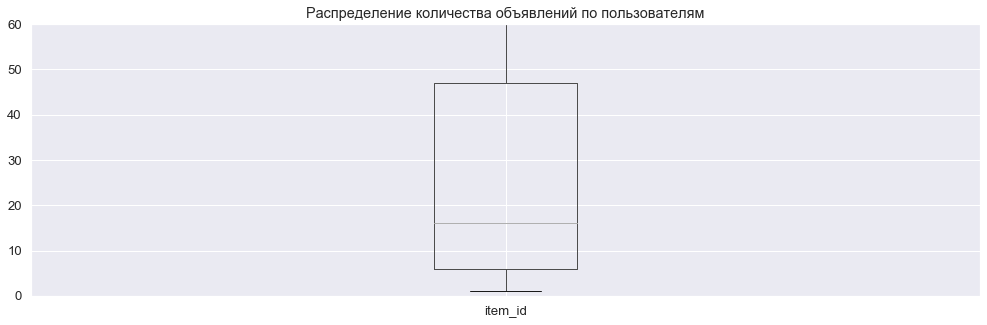

In [62]:
plt.subplots(figsize=(17,5))


plot = table_by_support.pivot_table(index = 'user_id',
                                            values = 'item_id',
                                            aggfunc = 'count').boxplot('item_id',
                                            ).set_ylim([0, 60])

plt.title('Распределение количества объявлений по пользователям');

In [63]:
group_ads = table_by_support.groupby('user_id').agg({'user_id':'nunique','item_id':'count'})
group_ads.head()

,user_id,item_id
user_id,,
100 000 095,1,109
100 000 209,1,15
100 000 217,1,15
100 000 232,1,144
100 000 242,1,205


In [64]:
group_ads_median = group_ads.item_id.median()
group_ads_median

16.0

Примерно 16 объявлений публикует каждый пользователь

**Объединим два фрейма и выделим две группы: с неудовлетворительной оценкой и все остальные.**

In [65]:
new_table = pd.merge(table_by_support, merge_support_data, on='user_id')
new_table.head(3)

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,date,duration,result_mentioned_by_user
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально
1,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 745 001 122,2014-01-03 21:57:17,Бытовая электроника,Аудио и видео,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально
2,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 117 002 008,2014-01-08 13:14:42,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально


**Группа нелояльных пользователей**

In [66]:
not_good = new_table[new_table.result_mentioned_by_user == 'Не удовлетворительно']
not_good.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,date,duration,result_mentioned_by_user
41943,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,8 547 750 079,2014-01-01 10:26:38,Транспорт,Автомобили,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,2015-11-15,4560,Не удовлетворительно
41945,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,10 750 000 262,2014-01-27 12:41:21,Транспорт,Запчасти и аксессуары,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,2015-11-15,4560,Не удовлетворительно
41947,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,10 661 751 827,2014-01-26 15:15:01,Транспорт,Мотоциклы и мототехника,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,2015-11-15,4560,Не удовлетворительно
41949,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,11 350 750 059,2014-02-02 17:45:50,Работа,Резюме,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,2015-11-15,4560,Не удовлетворительно
41951,5 279 000 095,2013-11-22 12:03:49,2013-11-22 12:06:36,11 792 500 634,2014-02-07 17:05:23,Бытовая электроника,Телефоны,Блокировки и отклонения,Заблокированная учетная запись,Решено,465c1852-fd24-4ecc-9d91-28d4a151d4f1,2015-11-15 16:39:00,2015-11-16 17:55:00,2015-11-15,4560,Не удовлетворительно


**Группа лояльных пользователей**

In [67]:
good = new_table[new_table.result_mentioned_by_user != 'Не удовлетворительно']
good.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,date,duration,result_mentioned_by_user
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально
1,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 745 001 122,2014-01-03 21:57:17,Бытовая электроника,Аудио и видео,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально
2,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 117 002 008,2014-01-08 13:14:42,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально
3,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 229 500 613,2014-01-09 20:45:54,Транспорт,Автомобили,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально
4,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,9 801 750 955,2014-01-16 22:10:12,Транспорт,Запчасти и аксессуары,Платные услуги и сервисы,Пополнение кошелька,Решено,0fc421a6-b171-4aa3-acf9-397886583a2b,2015-11-02 15:48:00,2015-11-07 11:41:00,2015-11-02,71580,Нейтрально


**Для двух групп сделаем группировку по уникальным пользователям и рассчитываем количество объявлений для каждого пользователя.**

In [68]:
not_good_group_ads = not_good.groupby('user_id').agg({'user_id':'nunique','item_id':'count'})
not_good_group_ads.head()

,user_id,item_id
user_id,,
100 000 242,1,205
100 003 000 014,1,1018
100 018 250 066,1,16
100 018 500 043,1,15
100 028 000 054,1,201


In [69]:
good_group_ads = good.groupby('user_id').agg({'user_id':'nunique','item_id':'count'})
good_group_ads.head()

,user_id,item_id
user_id,,
100 000 209,1,15
100 000 540,1,32
100 000 812,1,19
100 003 000 014,1,1018
100 004 250 034,1,102


**Находим среднее количество объявлений для пользователей в каждой из групп и сравниваем.**

In [70]:
not_good_ads_median = not_good_group_ads.item_id.median()
not_good_ads_median

26.0

In [71]:
good_ads_median = good_group_ads.item_id.median()
good_ads_median

20.0

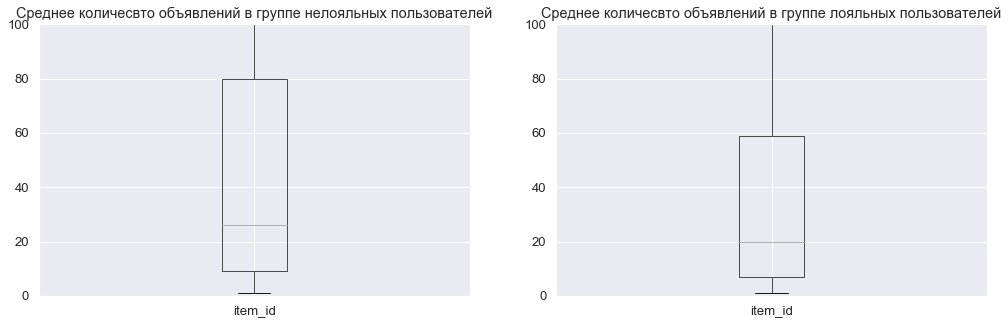

In [72]:
# Строим график распределения в первые несколько часов
plt.subplots(figsize=(17,5))
plot = not_good_group_ads.boxplot('item_id',ax = plt.subplot(1,2,1)
)
plt.ylim(0,100)
plt.title('Среднее количесвто объявлений в группе нелояльных пользователей')

plot = good_group_ads.boxplot('item_id', ax = plt.subplot(1,2,2)
)
plt.ylim(0,100)

plt.title('Среднее количесвто объявлений в группе лояльных пользователей');
plt.show()

Группа нелояльных пользователей в среднем размещает больше объявлений, чем в другая. 
26 против 20.

**Рассчитываем количество пользователей в каждой из групп**

In [73]:
not_good_cnt_users = not_good_group_ads.user_id.count()
not_good_cnt_users

16965

In [74]:
general_cnt_users = group_ads.user_id.count()
general_cnt_users

248260

**Умножаем среднее количество объявлений на количество пользователей, в каждой из групп. Проводим сравнение по примерному недополученному количеству объявлений.**

In [75]:
general_not_good_ads = (not_good_cnt_users * not_good_ads_median).astype(int)
general_not_good_ads

441090

In [76]:
general_cnt_ads = (general_cnt_users * group_ads_median).astype(int)
general_cnt_ads

3972160

**Находим доли от общего количества**

In [77]:
ratio_ads = (general_not_good_ads / general_cnt_ads) * 100
ratio_ads

11.104537581567712

In [78]:
ratio_users = (not_good_cnt_users / general_cnt_users) * 100
ratio_users

6.833561588657052

In [79]:
print('Количество нелояльных пользователей: ', not_good_cnt_users)
print()
print('Доля нелояльных пользователей от общей выборки: {:.1f}'.format(ratio_users), '%')
print()
print('Количество объявлений от нелояльных пользователей: ', general_not_good_ads)
print()
print('Доля объявлений от нелояльных пользователей от общей выборки: {:.1f}'.format(ratio_ads), '%')

Количество нелояльных пользователей:  16965

Доля нелояльных пользователей от общей выборки: 6.8 %

Количество объявлений от нелояльных пользователей:  441090

Доля объявлений от нелояльных пользователей от общей выборки: 11.1 %


### Вывод

В целом, из-за снижения лояльности пользователей, сайт Маргарито может потерять примерно 16 965 пользователей — 6.8% от общего количества за представленный период. И примерно 441 090 объявлений — 11.1% от общего количества. 


Здесь будут формулы по расчёту количества лояльных пользователей, объявлений и доли. 

In [80]:
good_cnt_users = good_group_ads.user_id.count()
general_good_ads = (good_cnt_users * good_ads_median).astype(int)
good_ratio_ads = (general_good_ads / general_cnt_ads) * 100
good_ratio_users = (good_cnt_users / general_cnt_users) * 100

### Проверим нашу гипотезу методами статистики


**Анализируем различие в среднем количестве объявлений по двум группам**

Сначала мы проверим нормальность распределение для нашей гипотезы. 

- Нулевая гипотеза: распределение нормальное
- Альтернативная гипотеза: распределение не нормальное.

In [81]:
alpha = .05 # критический уровень статистической значимости

results = st.anderson(not_good_group_ads['item_id']
                    )
p_value = good_group_ads['item_id'][1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  32
Не получилось отвергнуть нулевую гипотезу, всё нормально


Для нормального распределения будем использовать тест Стьюдента — t-тест

**Гипотеза**: Cреднее количество объявлений от нелояльных пользователей не отличается от ср. количества объявлений лояльных пользователей

Нулевая гипотеза **Н₀:**

    Среднее кол-во объявлений — одинаковое.

Альтернативная гипотеза **Н₁**:

    Среднее кол-во объявлений — отличается.

Пороговое значение alpha (критический уровень стат. значимости) задаем равным 5% (принятное, стандартное значение)

In [82]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(not_good_group_ads['item_id'], 
                       good_group_ads['item_id'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.002672597377015311
Отвергаем нулевую гипотезу: разница статистически значима


## Финальный вывод

Мы проанализировали полученные данные за представленный период и пришли к выводу, что существенная часть пользователей теряет свою лояльность к сайту Маргарито из-за неэффективной системы тех.поддержки.

Несмотря на преобладание положительных оценок, наблюдается выраженная часть неудовлетворительных оценок — **20.5%.**

Нелояльные пользователи оставляют негативные оценки тех.поддержке из-за нерешённости проблемы, либо превышения терпимого времени ожиданния ответа. Время ожидания для нелояльных пользователей сосатвляет **7 часов, а иногда и 4 дня**. Бывают случаи, когда ответы даются через 20 и 30 дней.


В основном, время ожидания ответа от тех.поддержки для всех пользователей ранжируется на несколько групп (по минутам, часам и дням):

- Есть быстрые ответы через 4-8 минут. Но среднее время ожидания ответа составляет 18 минут — доля в 19%
- Есть быстрые ответы через 1-5 часа. Но среднее время ожидания ответа составляет 6 часов — доля в 80%
- Есть быстрые ответы через 1-3 дня. Но среднее время ожидания ответа составляет 3 дня — доля в 42%

**Таким образом**, большая часть ответов приходится на длительное время ожидания от **6 часов до 3х дней**. На данный момент такая работа тех.поддержки не эффективна и негативно сказывается на лояльности пользователей.

Мы проверяли нашу гипотезу о разнице во времени ожидания ответа для лояльных и нелояльных пользователей на уровень статистической значимости. И пришли к выводу, что среднее время ожидания ответа в группе нелояльных пользователей значительно дольше, в сравнении с другой группой. Разница статистически значима.

В целом, нелояльных пользователей меньше, в сравнеии с лояльными. Но они склонны публиковать больше объявлений. Гипотезу о разнице в среднем количестве объявлений между группой лояльных и нелояльных пользователй мы проверили на уровень статистической значимости. 

**Мы оценили примерный урон для сайта Маргарито из-за нелояльных пользователей:**

- недополученное количество объявлений — 441 090 — 11.1% от общего количества за представленный период;
- недополученное количество пользователей — 16 965 — 6.8% от общего количества;



Несмотря на полученные результаты, мы должны понимать, что данный анализ урона является примерным, так как нам неизвестны средняя выручка по объявлениям, покупка рекламы и продвижения, платное размещение и т.д. Также, мы не учитывали группу нейтральных оценок и тех, кто не оставлял оценок. Бывает так, что такие безучастные пользователи быстро «отваливаются» от сайта. 

Мы рекомендуем разработать уникальный классификатор запросов для тех. поддержки. Он позволит ранжировать обращения, выделяя срочные и наоборот. Возможно, это поможет в эффективности работы. 
